<a href="https://colab.research.google.com/github/AnneKsatn/MIPT_ML_spring_2021/blob/master/%D0%94%D0%BE%D0%B1%D1%80%D0%BE_%D0%BF%D0%BE%D0%B6%D0%B0%D0%BB%D0%BE%D0%B2%D0%B0%D1%82%D1%8C_%D0%B2_Colaboratory!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!pip install torch

In [28]:
import torch
import numpy as np

In [29]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

# Train dataset

Text(0.5, 1.0, '$y = sin(x)$')

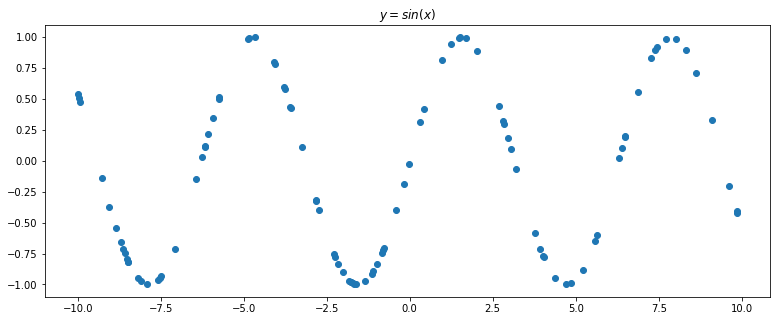

In [30]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$')

Добавим шум:

Text(0.5, 1.0, 'Gaussian noise')

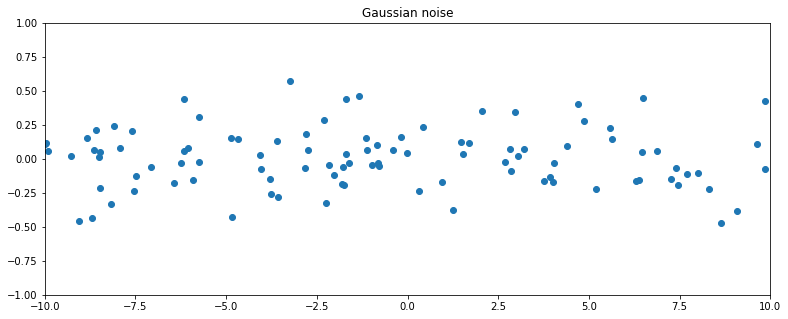

In [31]:
noise = torch.randn(y_train.shape) / 5

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])

plt.title('Gaussian noise')

Text(0, 0.5, 'y_train')

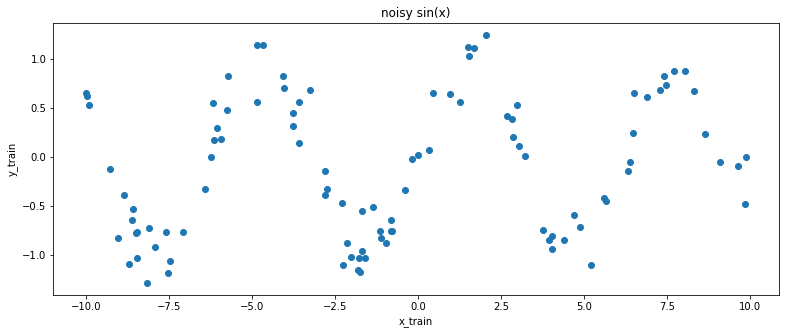

In [32]:
y_train = y_train + noise

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train')

Правильный размер данных.

In [ ]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

# Validation dataset

Text(0, 0.5, 'y_validation')

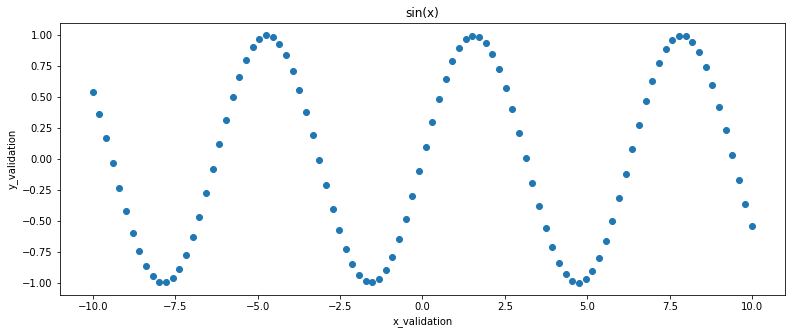

In [34]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)

plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')

plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation')


In [ ]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

# Model construction

In [41]:
class SineNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(SineNet, self).__init__()
    self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return x

In [42]:
sine_net = SineNet(50)

# Model Prediction

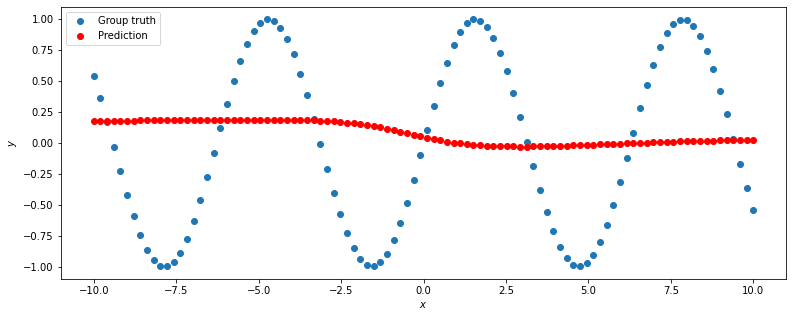

In [43]:
def predict(net, x, y):
  y_pred = net.forward(x)

  plt.plot(x.numpy(), y.numpy(), 'o', label = 'Group truth')
  plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction')
  plt.legend(loc = 'upper left')
  plt.xlabel('$x$')
  plt.ylabel('$y$')


predict(sine_net, x_validation, y_validation)

# Optimizer

In [44]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

# Loss function

In [45]:
def loss(pred, target):
  squares = (pred - target) ** 2
  return squares.mean()

# Trainig Process

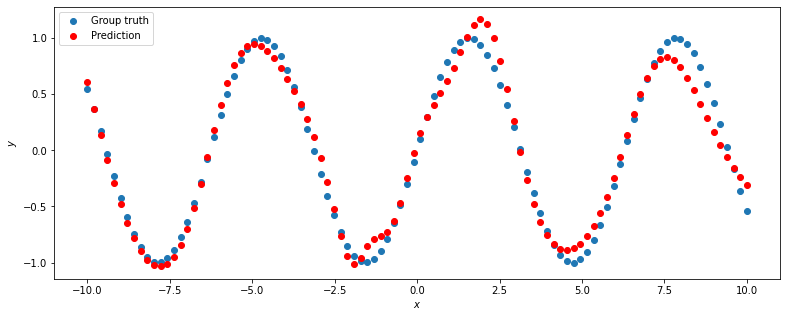

In [47]:
for epoch_index in range(2000):
  optimizer.zero_grad()

  y_pred = sine_net.forward(x_train)
  loss_val = loss(y_pred, y_train)

  loss_val.backward()

  optimizer.step()

predict(sine_net, x_validation, y_validation)